帰無仮説：製造ラインによって濃度の差がない
対立仮設：最低１つは製造ラインによって濃度の差がある

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# Pandasでデータを読み込み、その内容を何件か確認
data1 = pd.read_csv('ethanol_data.csv')

In [5]:
data1.shape

(50, 2)

In [6]:
data1.head()

,Density,Line
0,71.624345,A
1,69.388244,A
2,69.471828,A
3,68.927031,A
4,70.865408,A


<Axes: xlabel='Line', ylabel='Density'>

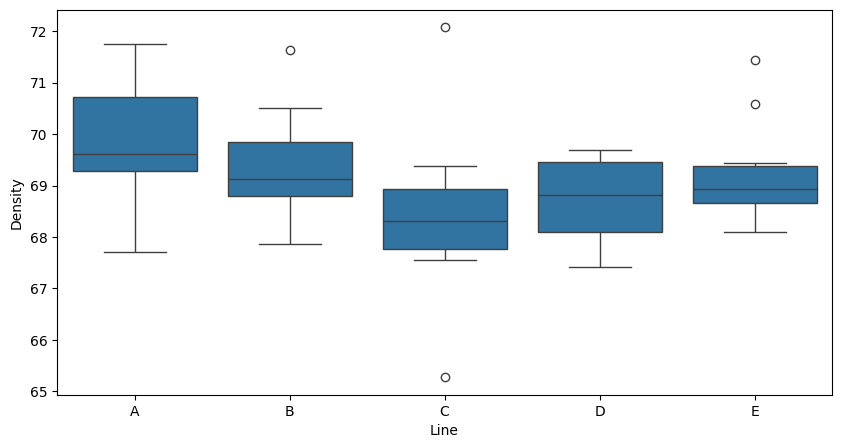

In [ ]:
# 横軸に製造ライン、縦軸に濃度をとった箱ひげ図
f, axes = plt.subplots(1, 1, figsize=(10,5))

sns.boxplot(x='Line', y='Density', data=data1, ax=axes)

In [14]:
np.sum(data1.query('Line == "C"')['Density'])

np.float64(684.2904350984495)

In [12]:
# 5つの製造ラインごとの濃度の平均値を計算
me_Line_A = np.mean(data1.query('Line == "A"')['Density'])
me_Line_B = np.mean(data1.query('Line == "B"')['Density'])
me_Line_C = np.mean(data1.query('Line == "C"')['Density'])
me_Line_D = np.mean(data1.query('Line == "D"')['Density'])
me_Line_E = np.mean(data1.query('Line == "E"')['Density'])

print(me_Line_A, me_Line_B, me_Line_C, me_Line_D, me_Line_E)

69.9028591091939 69.36865005840154 68.42904350984494 68.73809656689362 69.23379915563066


In [27]:
# 全データの濃度の平均値を計算
mu_all = np.mean(data1['Density'])
mu_all

np.float64(69.13448967999292)

In [ ]:
# 分散分析に必要な以下の要素を計算で求める
# 効果の平方和
mu_n_list = [me_Line_A] * data1.query('Line == "A"').shape[0] + \
            [me_Line_B] * data1.query('Line == "B"').shape[0] + \
            [me_Line_C] * data1.query('Line == "C"').shape[0] + \
            [me_Line_D] * data1.query('Line == "D"').shape[0] + \
            [me_Line_E] * data1.query('Line == "E"').shape[0] 

# 各要素の平均値
mu_n = np.array(mu_n_list)
# print(mu_n)

# 全体平均との差
effect = mu_n - mu_all
# print(effect)

# 差の平方和
squares_feed = np.sum(effect**2)
squares_feed

np.float64(13.098668335875512)

In [36]:
# 誤差の平方和
resid = data1['Density'] - mu_n

squares_resid = np.sum(resid**2)
squares_resid

np.float64(67.4069531127806)

In [ ]:
# 効果の自由度
df_line = data1['Line'].nunique() - 1
# 誤差の自由度
df_resid = (data1['Line'].value_counts() - 1).sum()

np.int64(45)

In [51]:
# 効果の分散
variance_feed = squares_feed/df_line
print(variance_feed)
# 誤差の分散
variance_resid = squares_resid/df_resid
print(variance_resid)

3.274667083968878
1.4979322913951245


In [52]:
# F比を計算
f_ratio = variance_feed/variance_resid
f_ratio

np.float64(2.1861249021602718)

In [54]:
# p値を計算
1-sp.stats.f.cdf(x=f_ratio, dfn=df_line, dfd=df_resid)

np.float64(0.08574964851206646)

In [ ]:
# statsmodelsで結果をチェック
anova_model_1 = smf.ols('Density ~ Line', data=data1).fit()
sm.stats.anova_lm(anova_model_1, typ=2)

,sum_sq,df,F,PR(>F)
Line,13.098668,4.0,2.186125,0.08575
Residual,67.406953,45.0,NaN,NaN


結果：0.08574964851206646
PR(>F)　0.08575
等しいのでｐ値の計算は正しい

有意水準は 5%で今回の結果（p値）が8.575%なので、帰無仮説を棄却できない
